#Task 1)

a) We made the decision to plot the life expectancy on the X-axis and the GDP per capita on the Y-axis. We made the this decision as we wanted to investigate if we could find a correlation between a person life expectancy and their respective countries GBP per capita. As GBP is one way measuring prosperity in a country we assumed that higher GDP per capita would imply a higher standard of living and thus also corelate to public health and a higher life expectancy.

We first decided to plot the life expectancy and the GDP per capita with all matching years of the two data sets, as we wanted to investigate earlier years data. As earlier in the past, health care was not as developed as it is today, and we assume that a strong economy might not necessary imply a longer life expectancy. 

We also made the choices of plotting the life expectancy and the GDP per capita of the latest matching year of the two data sets, as we wanted to investigate the newest data. Where we assume that a strong economy would imply a longer life expectancy. 


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv

def readFile(f):
    #
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    gdp = readFile('gdp-per-capita-worldbank.csv')
    lifeExp = readFile('life-expectancy.csv')
    gdp = makeDict(gdp)
    lifeExp = makeDict(lifeExp)

    result = []
    for key in gdp:
        if key in lifeExp:
            result.append([key,gdp[key],lifeExp[key]])
    return result




def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','GDP per capita','Life expectancy']
        writer.writerow(header)
        
        for row in l:
            writer.writerow(row)

writeToCSV(dataCollector(),'outputAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'outputLatest.csv')

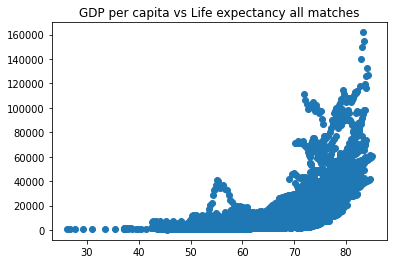

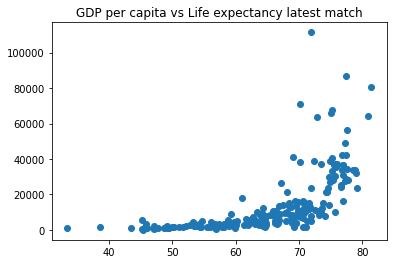

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
def plotData(inputFile,plotTitle):
    cleanedData = pd.read_csv(inputFile)

    gdpData = cleanedData['GDP per capita']
    lifeData = cleanedData['Life expectancy']

    gdpData = list(map(float, gdpData))
    lifeData = list(map(float, lifeData))

    plt.scatter(lifeData, gdpData)
    plt.title(plotTitle)
    plt.show()


plotData('outputAll.csv', 'GDP per capita vs Life expectancy all matches')
plotData('outputLatest.csv', 'GDP per capita vs Life expectancy latest match')

1b)
The first scatter plot shows the life expectancy and GDP per capita for all common years of the two data sets. The scatter plot can be interpreted to show a corelation between GDP per capita and life expectancy where a higher GDP per capita corelate to a higher life expectancy. This is reasonable in our opinion a country with a more developed economy it is reasonable to assume that they also have a more developed healthcare system. With a higher GDP per capita the assumption could be made that the country is also more developed in a social context. Another observation is that we noticed a break point around the life expectancy between 70 and 80. 

The second scatter plot show the life expectancy and GDP per capita for the latest matching year of the two data sets. This scatter plot is very similar to the first one, and the noticed break point between 70 and 80 could be explained as that healthcare has largely improved overall over time, but when reaching the age between 70 to 80 a stronger economy might be essential to treat for instance diseases that arise at the later stages of life. 

We also discussed that we assumed that the plot of all the matching years, would give us some form of indication of that the correlation between life expectancy and GDP per capita as the healthcare system was not as developed. We also tried plotting the earliest matching year to investigate, but realized that this is not really representative due to the largely inconsistent data sets. A lot of countries have data for the life expectancy reaching far back in time, but only have data for GDP per capita for the latest few years, thus resulting in a misleading plot. 

Thus we believe that the most relevant plot is the one with the latest data.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

def readFile(f):
    #
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    gdp = readFile('gdp-per-capita-worldbank.csv')
    lifeExp = readFile('life-expectancy.csv')
    gdp = makeDict(gdp)
    lifeExp = makeDict(lifeExp)

    result = []
    for key in gdp:
        if key in lifeExp:
            result.append([key,gdp[key],lifeExp[key]])
    return result




def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','GDP per capita','Life expectancy']
        writer.writerow(header)
                
        for row in l:
            writer.writerow(row)

#writeToCSV(dataCollector(),'outputAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

#writeToCSV(getLatest(),'outputLatest.csv')
def getStandardDiv():
    data = getLatest()

    n = len(data)
    lifeexp = [float(x[2]) for x in data]
    meanLife = sum(lifeexp)/n
    print('meanLife:',meanLife)

    #Found how to calculate this online 
    #https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/
    deviationsLife = [(x - meanLife) ** 2 for x in lifeexp]
    varianceLife = sum(deviationsLife)/n
    oneStandLife = np.sqrt(varianceLife)

    aboveMeanLife = []
    for i in range(len(data)):
        if lifeexp[i] > (meanLife + oneStandLife):
            aboveMeanLife.append(data[i][0])
    print(aboveMeanLife)

    gdp = [float(x[1]) for x in data]
    meanGdp = sum(gdp) / n
    print('meanGDP:',meanGdp)

    aboveLifeBelowGDP = []
    for i in range(len(data)):
        if lifeexp[i] > meanLife and gdp[i] < meanGdp:
            aboveLifeBelowGDP.append(data[i][0])
    
    print(aboveLifeBelowGDP)
getStandardDiv()


meanLife: 72.94283505154641
['Australia2019', 'Austria2019', 'Belgium2019', 'Bermuda2019', 'Canada2019', 'Cayman Islands2019', 'Cyprus2019', 'Denmark2019', 'Finland2019', 'France2019', 'Germany2019', 'Greece2019', 'Hong Kong2019', 'Iceland2019', 'Ireland2019', 'Israel2019', 'Italy2019', 'Japan2019', 'Luxembourg2019', 'Macao2019', 'Malta2019', 'Netherlands2019', 'New Zealand2019', 'Norway2019', 'Portugal2019', 'San Marino2019', 'Singapore2019', 'Slovenia2019', 'South Korea2019', 'Spain2019', 'Sweden2019', 'Switzerland2019', 'United Kingdom2019']
meanGDP: 22033.498690128774
['Albania2019', 'Algeria2019', 'Antigua and Barbuda2019', 'Armenia2019', 'Azerbaijan2019', 'Barbados2019', 'Belarus2019', 'Belize2019', 'Bosnia and Herzegovina2019', 'Brazil2019', 'Cape Verde2019', 'China2019', 'Colombia2019', 'Costa Rica2019', 'Dominica2019', 'Dominican Republic2019', 'Ecuador2019', 'El Salvador2019', 'Georgia2019', 'Guatemala2019', 'Honduras2019', 'Iran2019', 'Jamaica2019', 'Jordan2019', 'Lebanon201

In [4]:
import numpy as np
import csv
import pandas as pd

def readFile(f):
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    curr = readFile('corruption-perception-index.csv')
    gini = readFile('gini-index.csv')
    gini = makeDict(gini)
    curr = makeDict(curr)

    result = []
    for key in curr:
        if key in gini:
            result.append([key,curr[key],gini[key]])
    return result

def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','Curruption','Gini']
        writer.writerow(header)
                
        for row in l:
            writer.writerow(row)

#writeToCSV(dataCollector(),'currGiniAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'currGiniLatest.csv')
writeToCSV(dataCollector(), 'currGiniAll.csv')

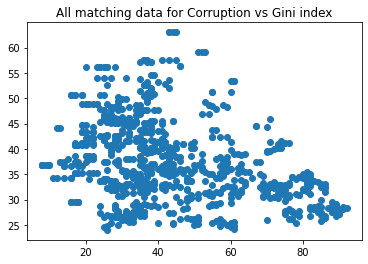

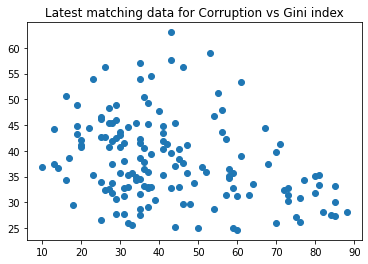

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
def plotData(inputFile,plotTitle):
    cleanedData = pd.read_csv(inputFile)

    corrData = cleanedData['Curruption']
    giniData = cleanedData['Gini']

    corrData = list(map(float, corrData))
    giniData = list(map(float, giniData))

    plt.scatter(corrData, giniData)
    plt.title(plotTitle)
    plt.show()


plotData('currGiniAll.csv', 'All matching data for Corruption vs Gini index')
plotData('currGiniLatest.csv', 'Latest matching data for Corruption vs Gini index')